In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Random sensor placement

In [33]:
import numpy as np
import random

def latin_hypercube_sampling(n, k):
    """
    Generate Latin Hypercube Sampling points.

    Parameters:
    - n: Number of samples (rows).
    - k: Number of variables (columns).

    Returns:
    - A numpy array of shape (n, k) containing the LHS points.
    """

    # Generate random permutations for each variable
    samples = np.zeros((n, k))
    for j in range(k):
        # Divide the interval [0, 1] into n equal intervals
        seg_size = 1.0 / n
        seg_starts = np.arange(0, 1, seg_size)
        
        # Randomly shuffle the starting points
        random.shuffle(seg_starts)
        
        # Fill each row with one of the random segments
        for i in range(n):
            samples[i, j] = random.uniform(seg_starts[i], seg_starts[i] + seg_size)

    return samples

def generate_sensor_pos(lhs_sample, domain_dim):
    rescaled_sample = np.copy(lhs_sample)
    # Convert columns to np.int32 after scaling
    rescaled_sample[:, 0] = (rescaled_sample[:, 0] * domain_dim[0])
    rescaled_sample[:, 1] = (rescaled_sample[:, 1] * domain_dim[1]) + 80
    return rescaled_sample

## Sensor measurement creation loop

In [75]:
Re_list = [300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
no_of_sensor_list = [64]
for n in no_of_sensor_list:
    # Create random sensor position
    k = 2   # Number of variables
    file_name_loc = "sensor_loc_" + str(n) + ".npy"
    rescaled_sample = np.load(file_name_loc)
    for Re in Re_list:
        file_name = "D:/data/Navier-Stokes/Navier-Stokes/Re_" + str(Re) + ".npy"
        field_data = np.load(file_name)
        sensor_measurement = np.zeros(shape=(n,39))
        for i in range(n):
            for j in range(39):
                sensor_measurement[i,j] = np.sqrt(field_data[int(rescaled_sample[i,0]),int(rescaled_sample[i,1]),j*3]**2 + 
                                                  field_data[int(rescaled_sample[i,0]),int(rescaled_sample[i,1]),j*3+1]**2) 
            # plt.plot(sensor_measurement[i,:])
            # plt.show()
        # print(sensor_measurement)
        file_name_data = "sensor_data_" + str(n) + "_" + str(Re) +".npy"
        np.save(file_name_data,sensor_measurement)


### Sensor location generation

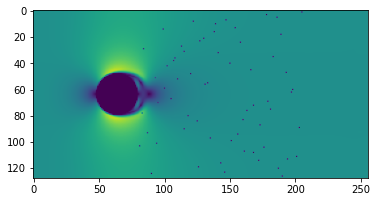

In [73]:
import numpy as np

# Generate random sample data
# Example usage:
Re = 750
file_name = "D:/data/Navier-Stokes/Navier-Stokes/Re_" + str(Re) + ".npy"
field_data = np.load(file_name)
n = 64  # Number of samples
k = 2   # Number of variables
sample = latin_hypercube_sampling(n, k)
rescaled_sample = generate_sensor_pos(sample, (128,126)) # Rescaling to 128 x 256

plot_field_data = np.copy(field_data)
# Loop to set specific elements of field_data to 0
for j in range(38):
    for i in range(n):
        plot_field_data[int(rescaled_sample[i, 0]), int(rescaled_sample[i,1]), j*3] = 0
        
plt.imshow(np.sqrt(plot_field_data[:,:,0]**2 + field_data[:,:,1]**2 ), vmin = 0, vmax = 2)
plt.show()
np.save('sensor_loc_64.npy', rescaled_sample)

# Sensor placement around obstacle

## Sensor location creation

[[135.72539305]
 [187.26579151]
 [247.04596983]
 [ 73.63979244]
 [328.74355569]
 [ 98.78029142]
 [224.08291998]
 [200.32845572]
 [ 81.44431464]
 [106.70040877]
 [ 40.45608069]
 [119.89495381]
 [129.2958252 ]
 [274.25995515]
 [ 57.20303373]
 [288.98118368]
 [356.14332775]
 [301.50937455]
 [255.62334392]
 [340.64614571]
 [165.45202514]
 [204.83304371]
 [ 46.95486175]
 [269.84820901]
 [148.26864267]
 [314.36502727]
 [  0.42898827]
 [315.6527717 ]
 [ 22.58036006]
 [ 11.38979649]
 [235.09728066]
 [168.84880237]]


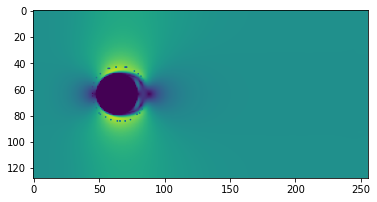

[[48.96395389 80.66005857]
 [43.16862727 63.34408013]
 [55.81015836 46.66282094]
 [69.91517787 86.14970647]
 [81.95192385 55.10374238]
 [60.79443617 86.75389989]
 [48.91499189 51.3903275 ]
 [44.30795319 58.70457044]
 [67.12418173 86.76630657]
 [57.96528558 86.11422934]
 [79.97897492 79.62616455]
 [53.53336085 84.20575362]
 [50.7001858  82.25161352]
 [65.55991699 45.05801683]
 [75.37493776 83.65250098]
 [70.83041007 46.14186569]
 [84.95244398 64.58752298]
 [74.97539934 48.09635207]
 [58.7858     45.65762752]
 [83.81328733 59.04057149]
 [43.67330929 71.27500186]
 [44.94175617 57.1805135 ]
 [78.33406066 81.34713997]
 [63.94436576 45.00007369]
 [46.13900866 77.04468145]
 [78.68376918 50.98710812]
 [84.99941138 66.15723094]
 [79.01745268 51.3208953 ]
 [83.39017974 74.06355565]
 [84.58643354 70.14713808]
 [51.98411923 48.77738088]
 [43.39647494 70.06137355]]


In [110]:
import numpy as np

def generate_sensor_pos(lhs_sample, domain_dim):
    rescaled_sample = np.copy(lhs_sample)
    # Convert columns to np.int32 after scaling
    rescaled_sample[:, 0] = (rescaled_sample[:, 0] * domain_dim)
    return rescaled_sample

# Generate random sample data
# Example usage:
Re = 750
file_name = "D:/data/Navier-Stokes/Navier-Stokes/Re_" + str(Re) + ".npy"
field_data = np.load(file_name)
n = 32  # Number of samples
k = 1   # Number of variables
sample = latin_hypercube_sampling(n, k)
rescaled_sample = generate_sensor_pos(sample, 360) # Rescaling to 128 x 256
print(rescaled_sample)
pos = np.zeros(shape = (n,2))
pos[:,0:1] = np.cos(np.deg2rad(rescaled_sample))*21+64
pos[:,1:2] = np.sin(np.deg2rad(rescaled_sample))*21+66
plot_field_data = np.copy(field_data)
# # Loop to set specific elements of field_data to 0
for j in range(38):
    for i in range(n):
        plot_field_data[int(pos[i, 0]), int(pos[i,1]), j*3] = 0
        
plt.imshow(np.sqrt(plot_field_data[:,:,0]**2 + field_data[:,:,1]**2 ), vmin = 0, vmax = 2)
plt.show()
print(pos)

In [ ]:
np.save('sensor_loc_cir_32.npy',pos)

## Sensor measurement creation loop

In [115]:
Re_list = [300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
no_of_sensor_list = [8,16,32,64]
for n in no_of_sensor_list:
    # Create random sensor position
    k = 2   # Number of variables
    file_name_loc = "sensor_loc_cir_" + str(n) + ".npy"
    rescaled_sample = np.load(file_name_loc)
    for Re in Re_list:
        file_name = "D:/data/Navier-Stokes/Navier-Stokes/Re_" + str(Re) + ".npy"
        field_data = np.load(file_name)
        sensor_measurement = np.zeros(shape=(n,39))
        for i in range(n):
            for j in range(39):
                sensor_measurement[i,j] = np.sqrt(field_data[int(rescaled_sample[i,0]),int(rescaled_sample[i,1]),j*3]**2 + 
                                                  field_data[int(rescaled_sample[i,0]),int(rescaled_sample[i,1]),j*3+1]**2) 
            # plt.plot(sensor_measurement[i,:])
            # plt.show()
        # print(sensor_measurement)
        file_name_data = "sensor_data_cir_" + str(n) + "_" + str(Re) +".npy"
        np.save(file_name_data,sensor_measurement)


# Full field data creation

In [120]:
Re_list = [300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
n_time_step = 39
domain_dim = (128,256)
for Re in Re_list:
    file_name = "D:/data/Navier-Stokes/Navier-Stokes/Re_" + str(Re) + ".npy"
    field_data = np.load(file_name)
    full_field_data = np.zeros(shape = (domain_dim[0],domain_dim[1],n_time_step))
    for j in range(n_time_step):
        full_field_data[:,:,j] = np.sqrt(field_data[:,:,j*3]**2 + 
                                                field_data[:,:,j*3+1]**2) 
        # plt.imshow(full_field_data[:,:,j])
        # plt.show()
    # print(sensor_measurement)
    file_name_data = "full_field_data_" + str(Re) +".npy"
    np.save(file_name_data,full_field_data)
